In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
train_dir_a = '../alexnet_deeper/cifar10_alexnet_model/'
train_dir_v = '../vgg/cifar10_vgg_model/'

In [46]:
training_data_v = np.genfromtxt (train_dir_v+'training_data.csv', delimiter=",")
validation_data_v = np.genfromtxt (train_dir_v+'validation_data.csv', delimiter=",")
validation_data_v = np.array(map(lambda x: [((x[0]-x[0]%10)/float(50000/float(batch_size))),x[1],x[2]],validation_data_v))
validation_data_v = validation_data_v[validation_data_v[:,0]<=60]
training_data_v = np.array(map(lambda x: [x[0]/(50000/float(batch_size)),x[1],x[2]], training_data_v))
training_v_df = pd.DataFrame(training_data_v, index=training_data_v.transpose()[0],columns=['step','error','accuracy'])
validation_v_df = pd.DataFrame(validation_data_v, index=validation_data_v.transpose()[0],columns=['step','error','accuracy'])
plot_v_df = pd.merge(training_v_df,validation_v_df,how='inner',on=['step','step'])
plot_v_data = plot_v_df.as_matrix().transpose()

In [49]:
training_data_a = np.genfromtxt (train_dir_a+'training_data.csv', delimiter=",")
validation_data_a = np.genfromtxt (train_dir_a+'validation_data.csv', delimiter=",")
validation_data_a = np.array(map(lambda x: [((x[0]-x[0]%10)/float(50000/float(batch_size))),x[1],x[2]],validation_data_a))
validation_data_a = validation_data_a[validation_data_a[:,0]<=60]
training_data_a = np.array(map(lambda x: [x[0]/(50000/float(batch_size)),x[1],x[2]], training_data_a))
training_a_df = pd.DataFrame(training_data_a, index=training_data_a.transpose()[0],columns=['step','error','accuracy'])
validation_a_df = pd.DataFrame(validation_data_a, index=validation_data_a.transpose()[0],columns=['step','error','accuracy'])
plot_a_df = pd.merge(training_a_df,validation_a_df,how='inner',on=['step','step'])
plot_a_data = plot_a_df.as_matrix().transpose()

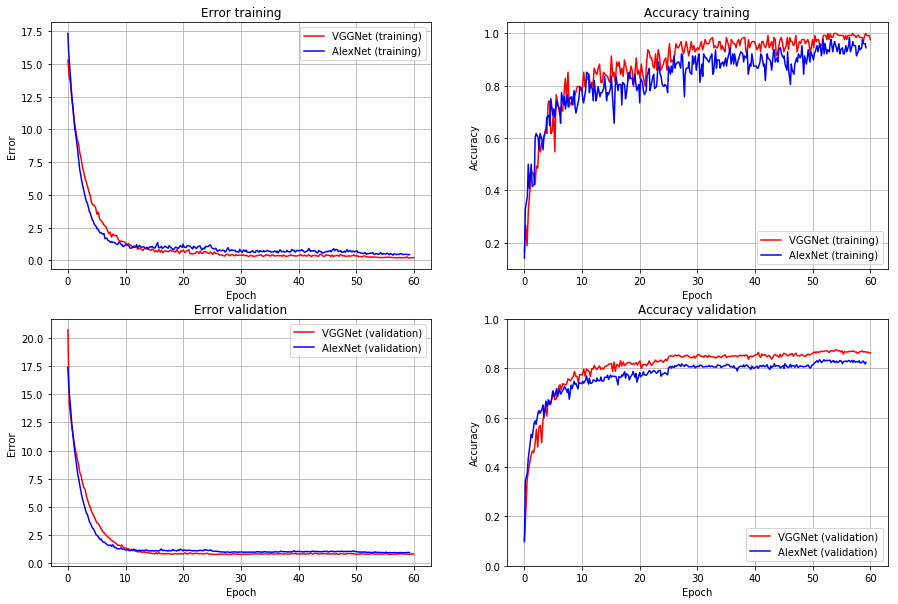

In [50]:
ax = plt.figure()
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.plot(plot_v_data[0], plot_v_data[1], 'r-', label='VGGNet (training)')
plt.plot(plot_a_data[0], plot_a_data[1], 'b-', label='AlexNet (training)')
plt.title('Error training')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='upper right', fontsize='medium')

plt.subplot(222)
plt.plot(plot_v_data[0], plot_v_data[2], 'r-', label='VGGNet (training)')
plt.plot(plot_a_data[0], plot_a_data[2], 'b-', label='AlexNet (training)')
plt.title('Accuracy training')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', fontsize='medium')

plt.subplot(223)
plt.plot(plot_v_data[0], plot_v_data[3], 'r-', label='VGGNet (validation)')
plt.plot(plot_a_data[0], plot_a_data[3], 'b-', label='AlexNet (validation)')
plt.title('Error validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='upper right', fontsize='medium')

plt.subplot(224)
plt.plot(plot_v_data[0], plot_v_data[4], 'r-', label='VGGNet (validation)')
plt.plot(plot_a_data[0], plot_a_data[4], 'b-', label='AlexNet (validation)')
plt.title('Accuracy validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1.2, 0.2))
plt.legend(loc='lower right', fontsize='medium')

plt.savefig('alex_vgg.pdf', bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
train_dir = 'cifar100_vgg_model/'

In [ ]:
training_data = np.genfromtxt (train_dir+'training_data.csv', delimiter=",")
validation_data = np.genfromtxt (train_dir+'validation_data.csv', delimiter=",")

In [ ]:
validation_data = np.array(map(lambda x: [((x[0]-x[0]%10)/float(50000/float(batch_size))),x[1],x[2]],validation_data))
training_data = np.array(map(lambda x: [x[0]/(50000/float(batch_size)),x[1],x[2]], training_data))

In [ ]:
training_df = pd.DataFrame(training_data, index=training_data.transpose()[0],columns=['step','error','accuracy'])
validation_df = pd.DataFrame(validation_data, index=validation_data.transpose()[0],columns=['step','error','accuracy'])

In [ ]:
plot_df = pd.merge(training_df,validation_df,how='inner',on=['step','step'])

In [ ]:
plot_data = plot_df.as_matrix().transpose()

In [ ]:
ax = plt.figure()
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(plot_data[0], plot_data[1], 'r-', label='VGG (training)')
plt.plot(plot_data[0], plot_data[3], 'r--', label='VGG (validation)')
'''plt.plot(err_train_tanh.keys(), err_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(err_valid_tanh.keys(), err_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(err_train_relu.keys(), err_train_relu.values(), 'g-', label='relu (training)')
plt.plot(err_valid_relu.keys(), err_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Error training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='lower left', fontsize='medium')

plt.subplot(122)
plt.plot(plot_data[0], plot_data[2], 'r-', label='Alexnet (training)')
plt.plot(plot_data[0], plot_data[4], 'r--', label='Alexnet (validation)')
'''plt.plot(acc_train_tanh.keys(), acc_train_tanh.values(), 'b-', label='tanh (training)')
plt.plot(acc_valid_tanh.keys(), acc_valid_tanh.values(), 'b--', label='tanh (validation)')
plt.plot(acc_train_relu.keys(), acc_train_relu.values(), 'g-', label='relu (training)')
plt.plot(acc_valid_relu.keys(), acc_valid_relu.values(), 'g--', label='relu (validation)')'''
plt.title('Accuracy training and validation')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', fontsize='medium')

#plt.savefig('activation_functions.pdf', bbox_inches='tight')
plt.show()